In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go

In [4]:
data = pd.read_csv("bank-full.csv", sep = ";")

In [5]:
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [84]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [115]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

data_numerical = pd.DataFrame()

one_hot_columns = ["job", "marital", "default", "housing", "loan", "contact", "poutcome"]
label_columns = ["education", "month"]
numeric_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

for col in data.columns:
    if col in label_columns:
        data_numerical[col] = label_encoder.fit_transform(data[col])
    if col in one_hot_columns:
        data_numerical[col] = pd.factorize(data[col])[0]
    if col in numeric_columns:
        data_numerical[col] = data[col]

data_numerical.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,0,0,2,0,2143,0,0,0,5,8,261,1,-1,0,0
1,44,1,1,1,0,29,0,0,0,5,8,151,1,-1,0,0
2,33,2,0,1,0,2,0,1,0,5,8,76,1,-1,0,0
3,47,3,0,3,0,1506,0,0,0,5,8,92,1,-1,0,0
4,33,4,1,3,0,1,1,0,0,5,8,198,1,-1,0,0


In [116]:
def data_distribution_function(df):
    
   
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    axes = axes.flatten()
    
   
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        
        
        mean_value = df[column].mean()
        axes[i].axvline(mean_value, color='#F72AC6', linestyle='--', linewidth=2, label='Mean')
    
        
        median_value = df[column].median()
        axes[i].axvline(median_value, color='#FADD4B', linestyle='--', linewidth=2, label='Median')
    
      
        mode_value = df[column].mode()[0]
        axes[i].axvline(mode_value, color='#787150', linestyle='--', linewidth=3, label='Mode')
        
        
        skew_value = df[column].skew()
        
    
        axes[i].text(0.95, 0.01, f'Skew: {skew_value:.2f}', 
                     verticalalignment='bottom', horizontalalignment='right', 
                     transform=axes[i].transAxes, 
                     color='black', fontsize=12)
        
        
        axes[i].set_title(column)
    
       
        axes[i].legend()
    
  
    plt.tight_layout()
    plt.show()
    

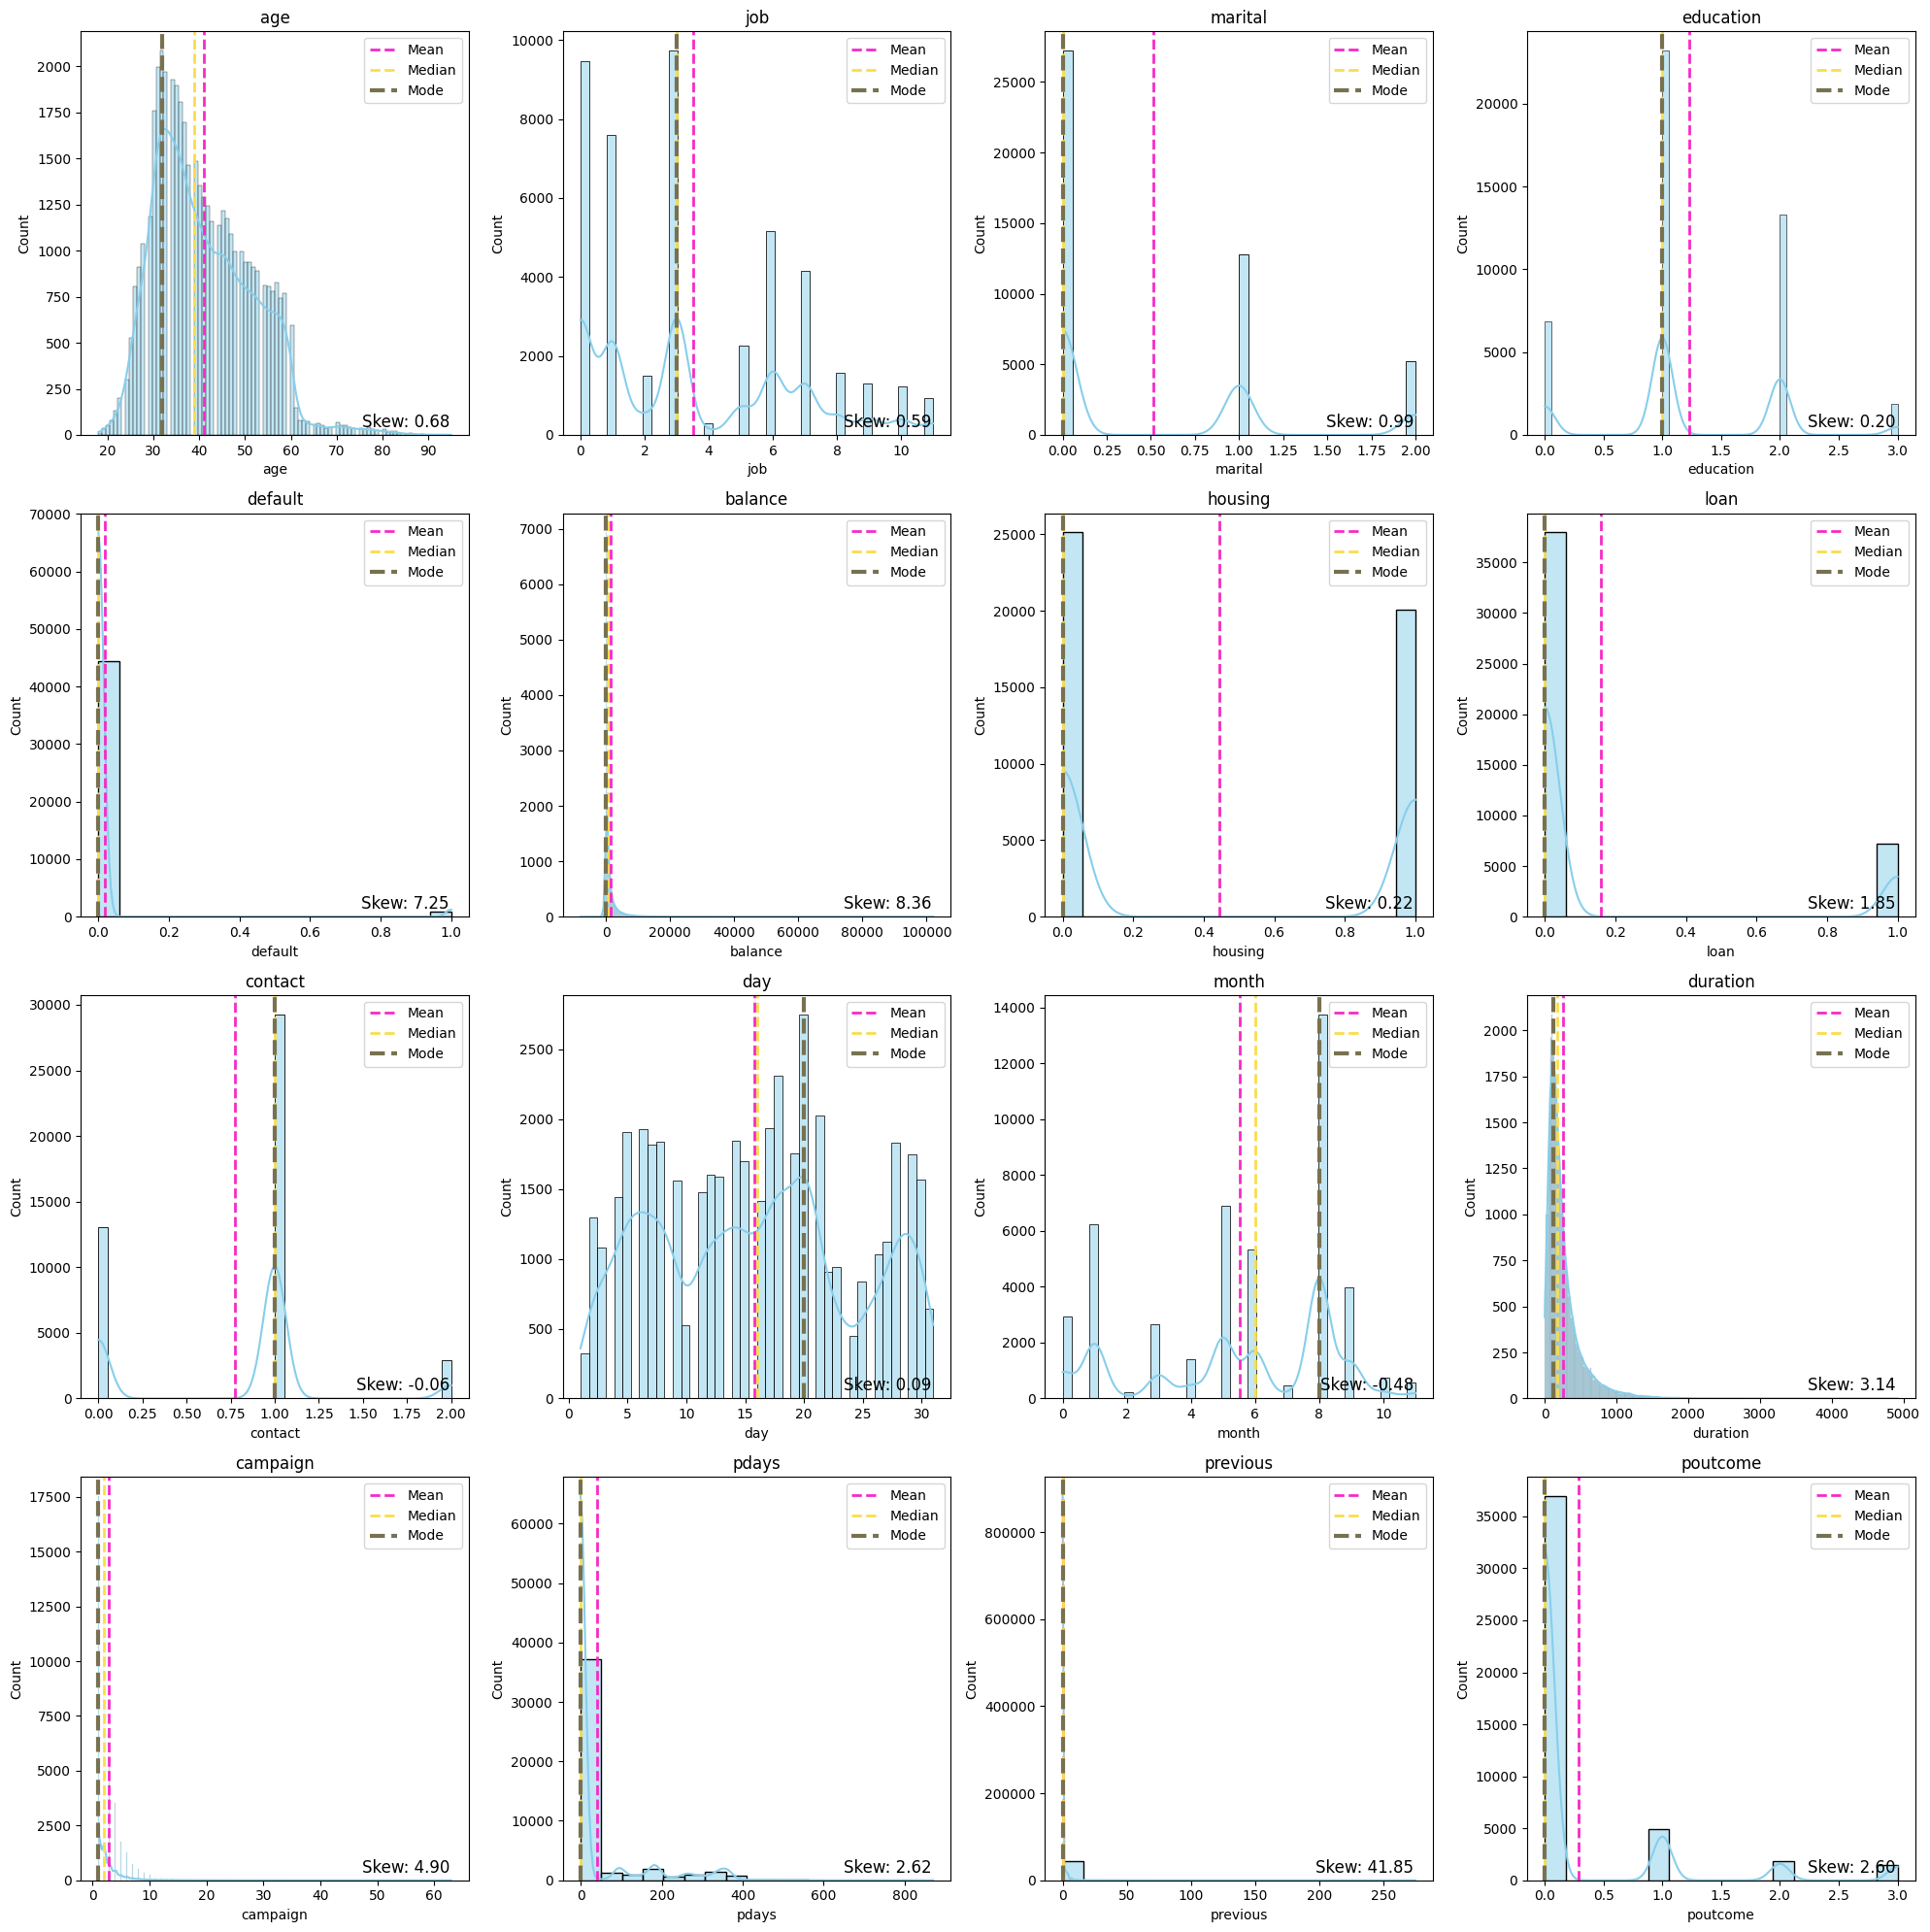

In [117]:
data_distribution_function(data_numerical)

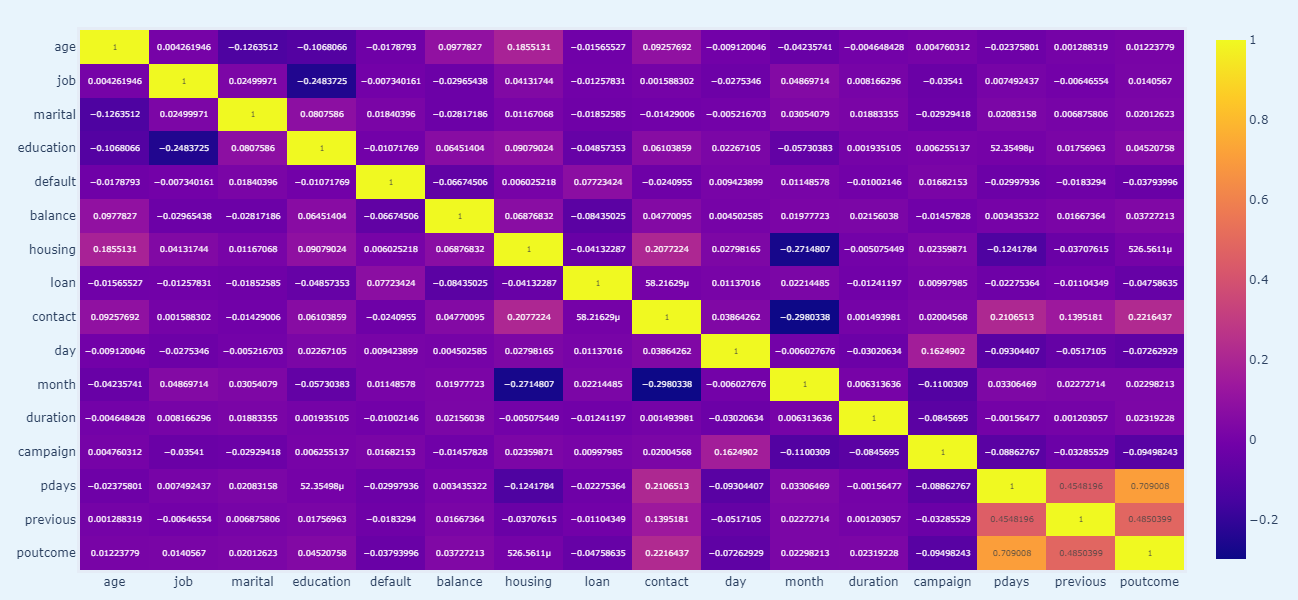

In [114]:
fig = px.imshow(data_numerical.corr(), text_auto = True, aspect="auto")
fig.update_layout(
    title_font = dict(size=25),
    title_x = 0.5,
    title_y = 0.95,
    height = 600,
    margin = dict(l = 80,
                r = 80,
                b = 30,
                t = 30, 
                pad = 3),
    paper_bgcolor = "#e8f4fc",
)
fig.show()

In [131]:
def boxplot_function(df):
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    axes = axes.flatten()
    
   
    for i, column in enumerate(df.columns):
        sns.boxplot(df[column], ax=axes[i])  # Her sütunu ayrı bir eksende çizdir
        axes[i].set_title(column)
    
    plt.tight_layout()
    plt.show()
    

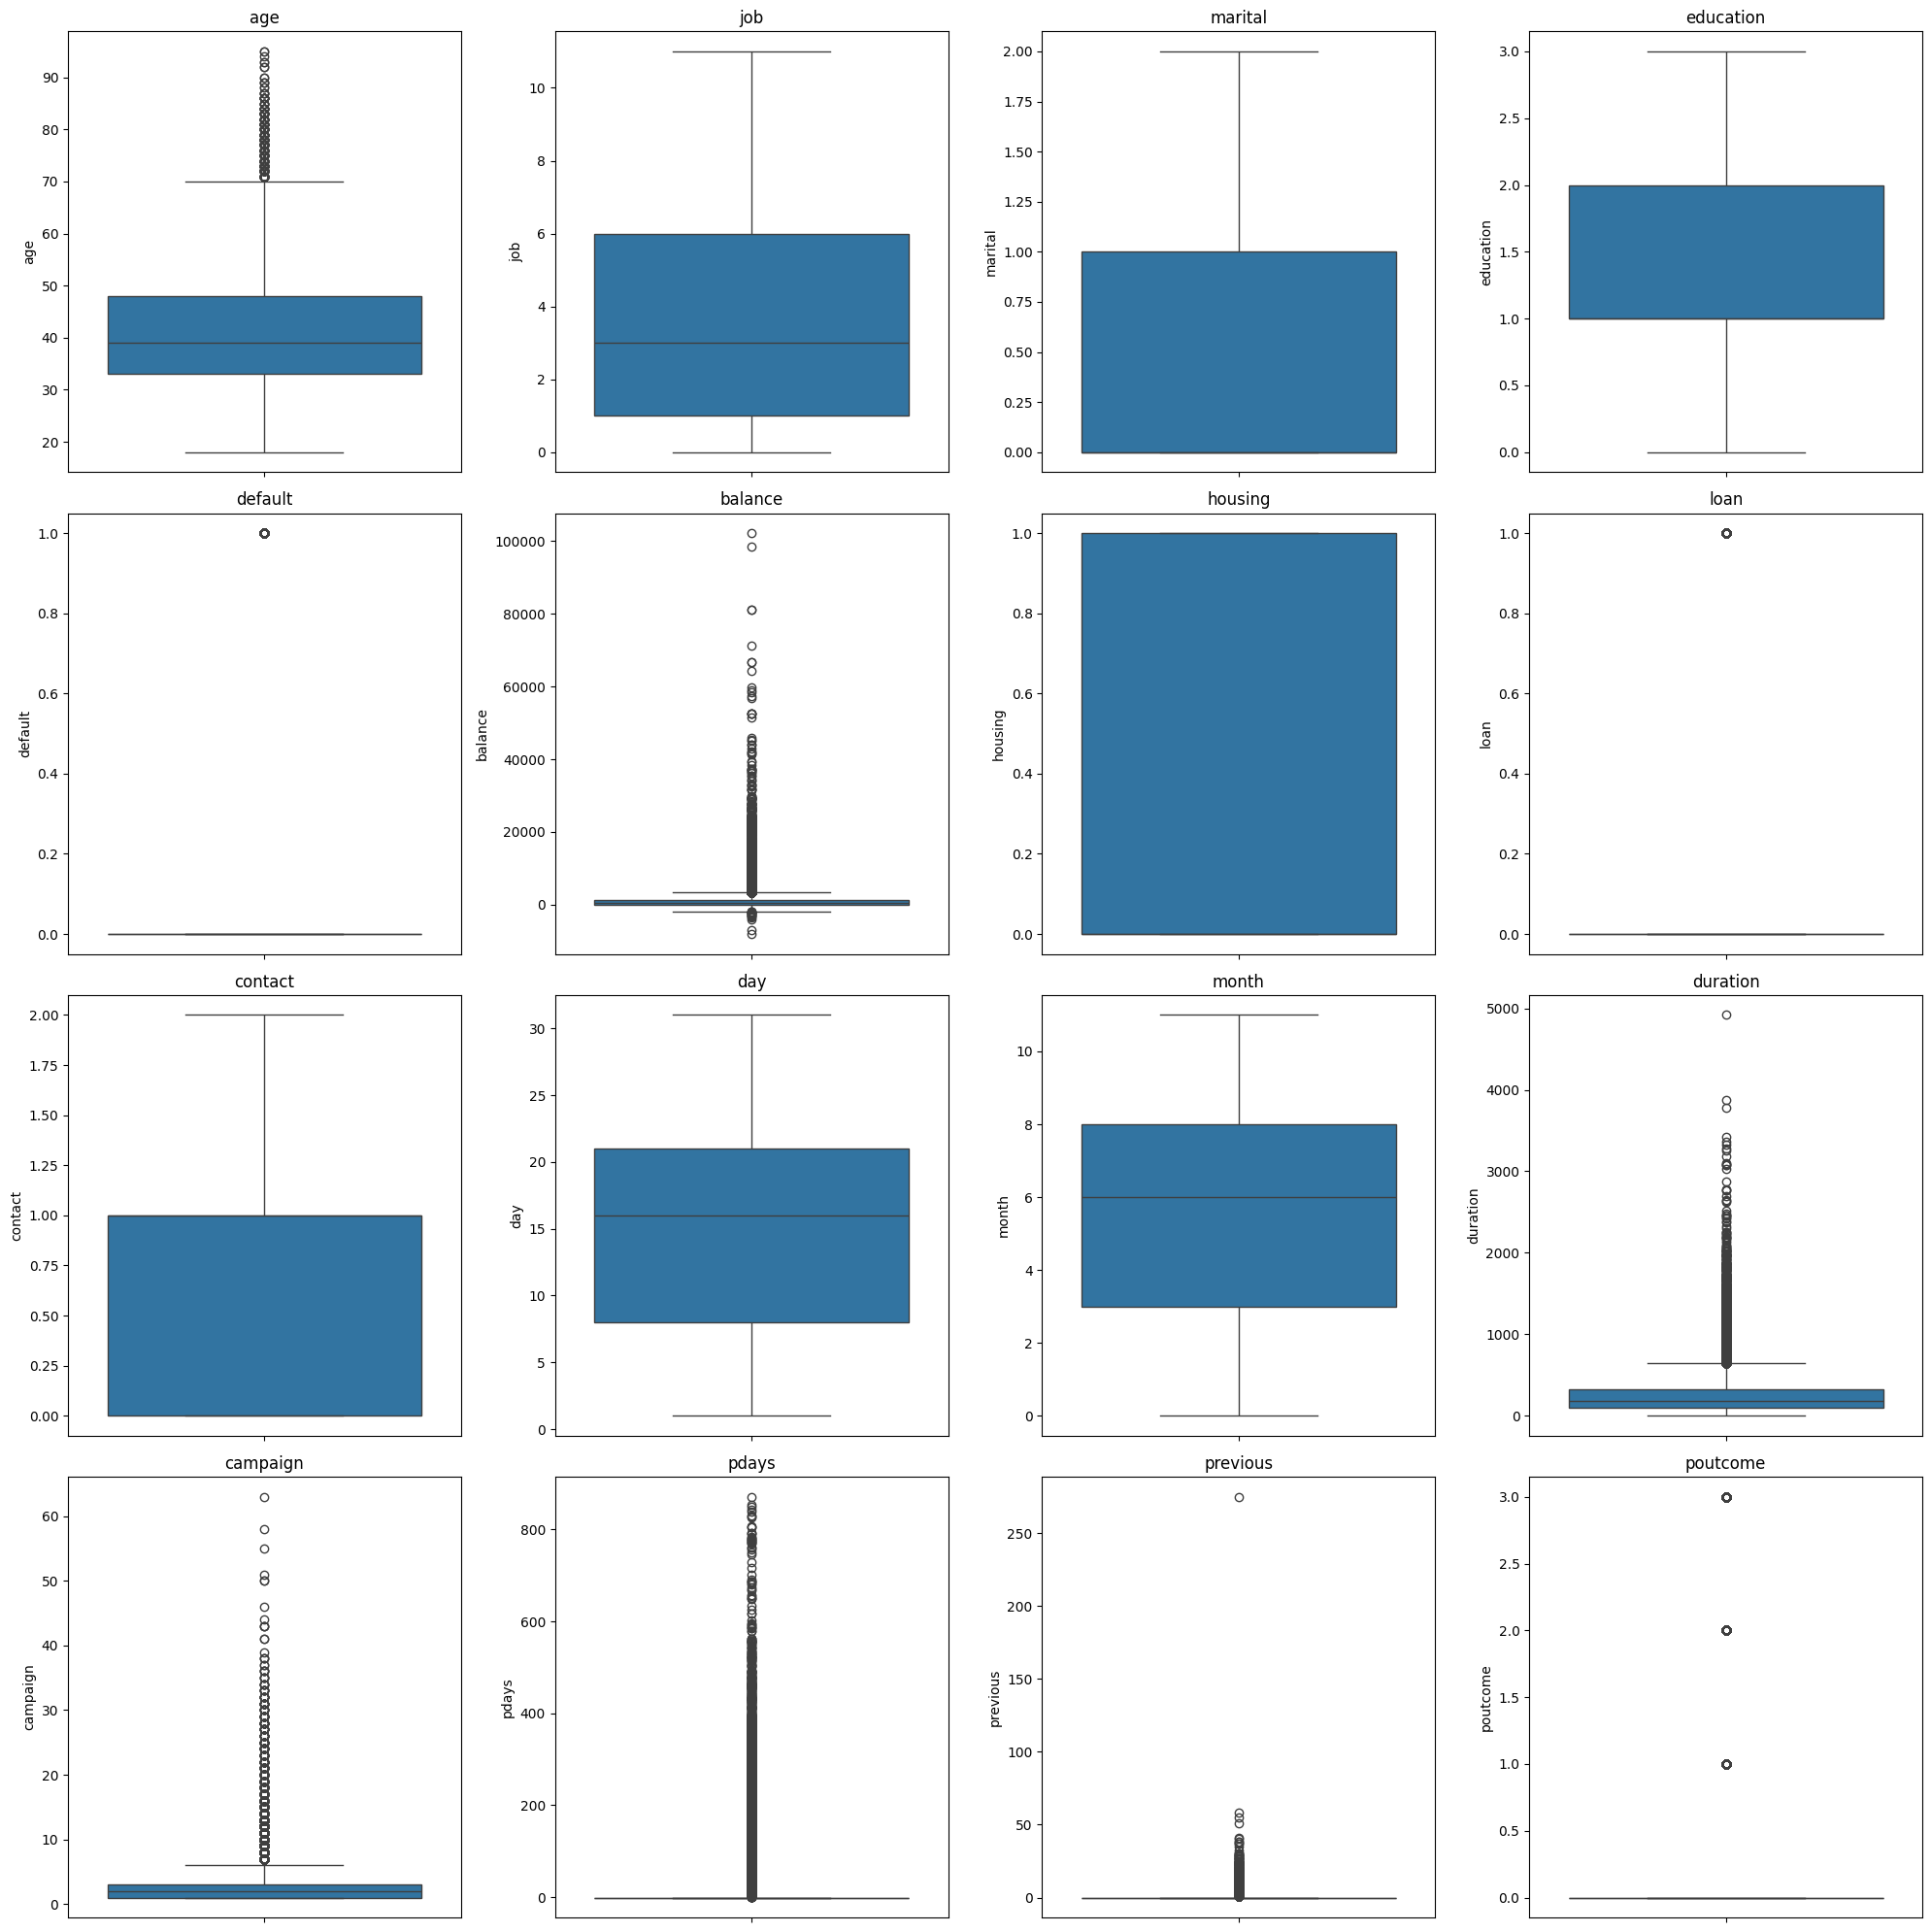

In [132]:
boxplot_function(data_numerical)

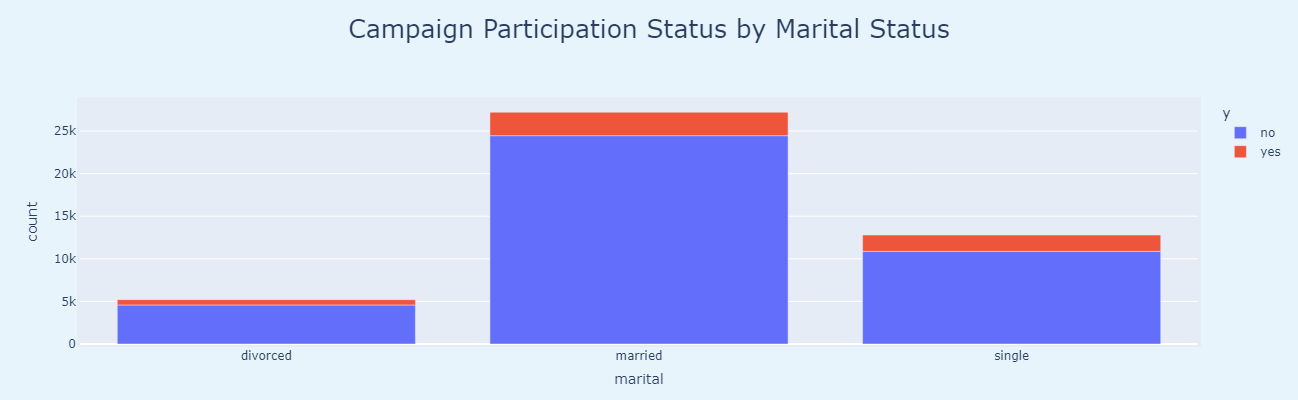

In [52]:
target_vs_marital = data.groupby(["marital", "y"]).size().reset_index(name = "count")

fig = px.bar(target_vs_marital, x = "marital", y = "count", color = "y", title = "Campaign Participation Status by Marital Status")

fig.update_layout(
    title_font = dict(size=25),
    title_x = 0.5,
    title_y = 0.95,
    width =800,
    height = 400,
    margin = dict(l = 30,
                r = 80,
                b = 30,
                t = 100, 
                pad = 3),
    paper_bgcolor = "#e8f4fc",
)

# Grafiği göster
fig.show()

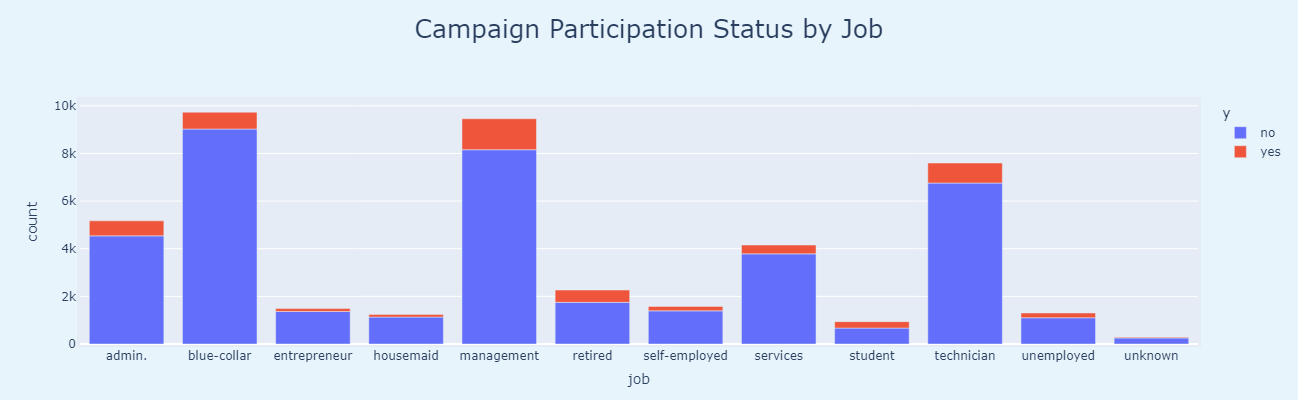

In [71]:
target_vs_job = data.groupby(["job","y"]).size().reset_index(name = "count")

fig = px.bar(target_vs_job, x = "job", y = "count", color = "y", title = "Campaign Participation Status by Job")

fig.update_layout(
    title_font = dict(size=25),
    title_x = 0.5,
    title_y = 0.95,
    width =800,
    height = 400,
    margin = dict(l = 80,
                r = 80,
                b = 30,
                t = 100, 
                pad = 3),
    paper_bgcolor = "#e8f4fc",
)

fig.show()


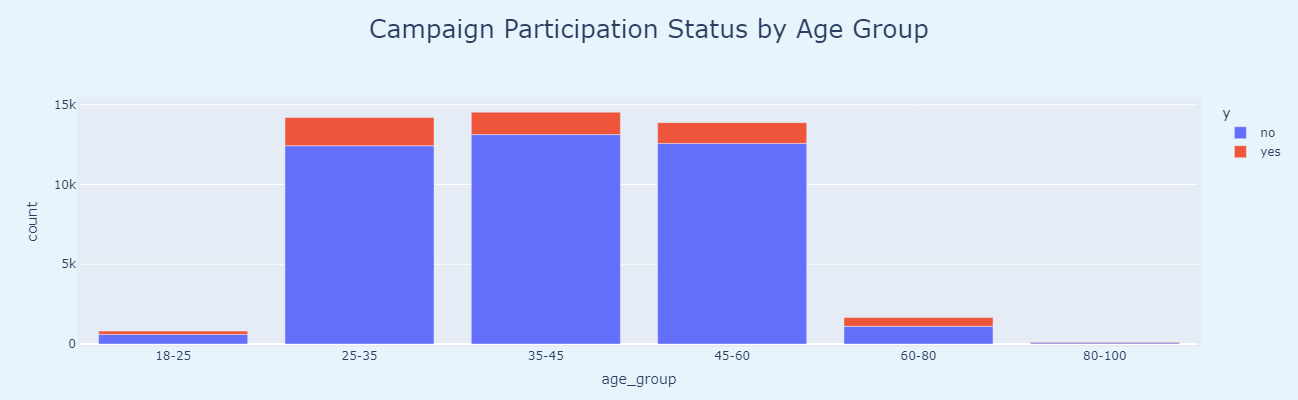

In [76]:
# Yaş aralıklarını belirleme
bins = [18, 25, 35, 45, 60, 80, 100]
labels = ["18-25", "25-35", "35-45", "45-60", "60-80","80-100"]

df_feature = data.copy(deep = True)
# Yaşları aralıklara ayırma
df_feature['age_group'] = pd.cut(data['age'], bins = bins, labels = labels, right=False)

# Gruplandırma ve kredi durumunu analiz etme
target_vs_age_group = df_feature.groupby(['age_group', 'y'], observed = False).size().reset_index(name='count')


fig = px.bar(target_vs_age_group, x = "age_group", y = "count", color = "y", title = "Campaign Participation Status by Age Group")

fig.update_layout(
    title_font = dict(size=25),
    title_x = 0.5,
    title_y = 0.95,
    width =800,
    height = 400,
    margin = dict(l = 80,
                r = 80,
                b = 30,
                t = 100, 
                pad = 3),
    paper_bgcolor = "#e8f4fc",
)

fig.show()



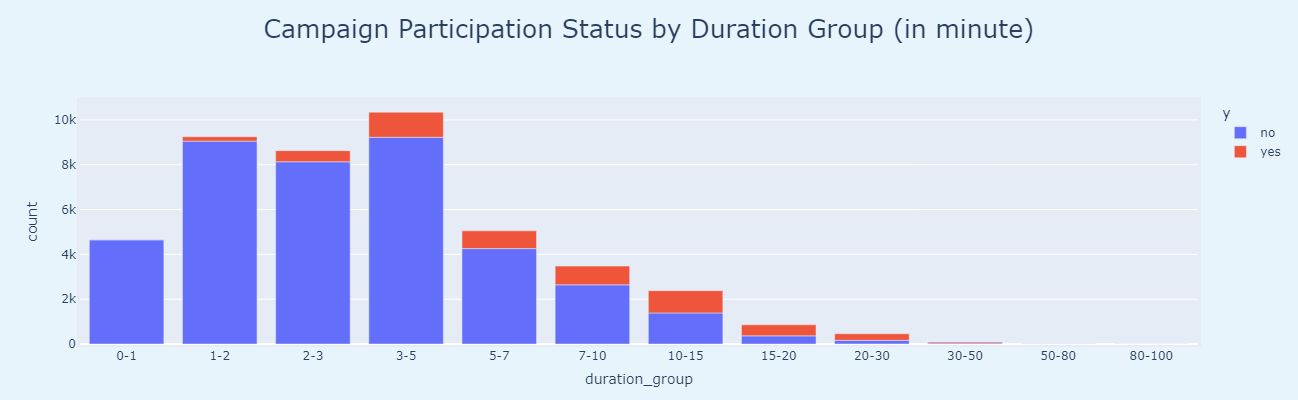

In [80]:
bins = [0, 1, 2, 3, 5, 7, 10, 15, 20, 30, 50, 80, 100]
labels = ["0-1","1-2", "2-3", "3-5", "5-7", "7-10", "10-15", "15-20", "20-30", "30-50", "50-80", "80-100"]

df_feature["duration_minute"] = df_feature["duration"] / 60

df_feature["duration_group"] = pd.cut(df_feature["duration_minute"], bins = bins , labels = labels , right = False)

target_vs_duration = df_feature.groupby(["duration_group","y"], observed = False).size().reset_index(name='count')

fig = px.bar(target_vs_duration, x = "duration_group", y = "count", color = "y", title = "Campaign Participation Status by Duration Group (in minute)")

fig.update_layout(
    title_font = dict(size=25),
    title_x = 0.5,
    title_y = 0.95,
    width =800,
    height = 400,
    margin = dict(l = 80,
                r = 80,
                b = 30,
                t = 100, 
                pad = 3),
    paper_bgcolor = "#e8f4fc",
)

fig.show()

                                        

#### Lastly, we will check the distribution of class labels to determine whether we need to make any adjustments to the class labels. As a result, the number of "yes" class labels is very small, so we will need to generate more samples for this label.

In [135]:
data["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64